---
title: Lasso Linear Regression
subtitle: Online Shopping
date: 2025-04-07
from: markdown+emoji
execute: 
  eval: false
---

In [1]:
from google.colab import data_table
data_table.enable_dataframe_formatter()  # Enabling an interactive DataFrame display

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale # zero mean & one s.d.
from sklearn.linear_model import LassoCV, lasso_path
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv("https://bcdanl.github.io/data/browser-online-shopping.zip")
df

,spend,atdmt.com,yahoo.com,whenu.com,weatherbug.com,msn.com,google.com,aol.com,questionmarket.com,googlesyndication.com-o02,...,ugo.com,cox.com,spicymint.com,real.com-o01,targetnet.com,effectivebrand.com,dallascowboys.com,leadgenetwork.com,in.us,vistaprint.com
0,424,4.052026,11.855928,0.000000,0.000000,0.250125,6.528264,0.150075,1.350675,3.401701,...,0.0,0.025013,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
1,2335,4.448743,8.446164,0.000000,0.000000,0.644745,0.451322,0.128949,0.967118,1.225016,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
2,279,7.678815,0.487234,0.000000,31.904112,13.213798,0.954980,0.000000,2.124342,2.514130,...,0.0,0.000000,0.000000,0.019489,0.019489,0.0,0.0,0.0,0.0,0.000000
3,829,13.547802,18.509289,0.045310,0.045310,0.294517,1.110104,0.067966,3.194382,3.149071,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.067966
4,221,2.879581,10.558464,0.000000,0.000000,3.606748,1.396161,0.000000,0.727167,0.988947,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,102,6.040454,26.350790,0.000000,0.000000,0.000000,0.055417,4.710446,2.909393,0.554170,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
9996,5096,8.044292,3.012539,9.102752,0.032568,1.612115,1.840091,9.037616,3.289367,1.009608,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
9997,883,7.053942,1.659751,0.000000,0.000000,9.543568,0.414938,13.692946,2.074689,2.074689,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
9998,256,10.408043,0.473093,0.000000,0.000000,18.568894,0.887049,3.370787,3.548196,0.236546,...,0.0,0.532229,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000


In [3]:
X = df.drop('spend', axis = 1)
y = df['spend']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values
y_test_np = y_test.values

In [4]:
# LassoCV with a range of alpha values
lasso_cv = LassoCV(n_alphas = 100, # default is 100
                   alphas = None, # alphas=None automatically generate 100 candidate alpha values
                   cv = 5,
                   random_state=42,
                   max_iter=100000)
lasso_cv.fit(X_train.values, np.log(y_train.values))

print("LassoCV - Best alpha:", lasso_cv.alpha_)


# Create a DataFrame including the intercept and the coefficients:
coef_lasso = pd.DataFrame({
    'predictor': list(X_train.columns),
    'coefficient':  list(lasso_cv.coef_),
    'exp_coefficient': np.exp(  list(lasso_cv.coef_) )
})


# Evaluate
y_pred_lasso = lasso_cv.predict(X_test.values)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("LassoCV - MSE:", mse_lasso)


LassoCV - Best alpha: 0.004098154620620373
LassoCV - MSE: 88099012.81854005


In [ ]:
# LassoCV with a range of alpha values
lasso_cv = LassoCV(n_alphas = 100, # default is 100
                   alphas = None, # alphas=None automatically generate 100 candidate alpha values
                   cv = 5,
                   random_state=42,
                   max_iter=100000)
lasso_cv.fit(X_train_np, np.log(y_train_np))

print("LassoCV - Best alpha:", lasso_cv.alpha_)


# Create a DataFrame including the intercept and the coefficients:
coef_lasso = pd.DataFrame({
    'predictor': list(X_train.columns),
    'coefficient':  list(lasso_cv.coef_),
    'exp_coefficient': np.exp(  list(lasso_cv.coef_) )
})


# Evaluate
y_pred_lasso = lasso_cv.predict(X_test_np)
mse_lasso = mean_squared_error(y_test_np, y_pred_lasso)
print("LassoCV - MSE:", mse_lasso)


LassoCV - Best alpha: 0.004098154620620373
LassoCV - MSE: 88099012.81854005


In [5]:
coef_lasso = coef_lasso.query('coefficient != 0')
coef_lasso.shape[0]

307

In [6]:
coef_lasso.sort_values('coefficient', ascending = False)

,predictor,coefficient,exp_coefficient
895,bizrate.com-o01,1.388699,4.009628
770,staples.com,0.757120,2.132127
690,travelhook.net,0.688146,1.990022
843,united.com,0.610771,1.841850
506,victoriassecret.com,0.584030,1.793251
...,...,...,...
279,new.net,-0.181475,0.834039
374,coolsavings.com,-0.187875,0.828718
851,rsc03.net,-0.231599,0.793264
443,checkm8.com,-0.240327,0.786371


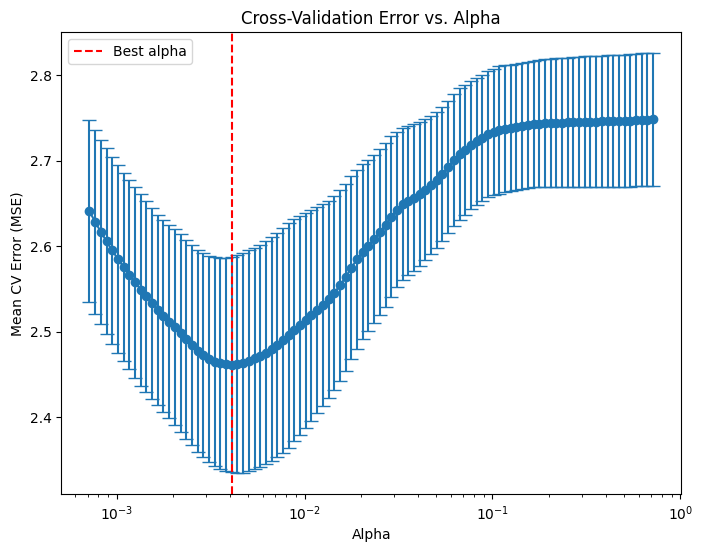

In [7]:
# Compute the mean and standard deviation of the CV errors for each alpha.
mean_cv_errors = np.mean(lasso_cv.mse_path_, axis=1)
std_cv_errors = np.std(lasso_cv.mse_path_, axis=1)

plt.figure(figsize=(8, 6))
plt.errorbar(lasso_cv.alphas_, mean_cv_errors, yerr=std_cv_errors, marker='o', linestyle='-', capsize=5)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean CV Error (MSE)')
plt.title('Cross-Validation Error vs. Alpha')
#plt.gca().invert_xaxis()  # Optionally invert the x-axis so lower alphas (less regularization) appear to the right.
plt.axvline(x=lasso_cv.alpha_, color='red', linestyle='--', label='Best alpha')
plt.legend()
plt.show()

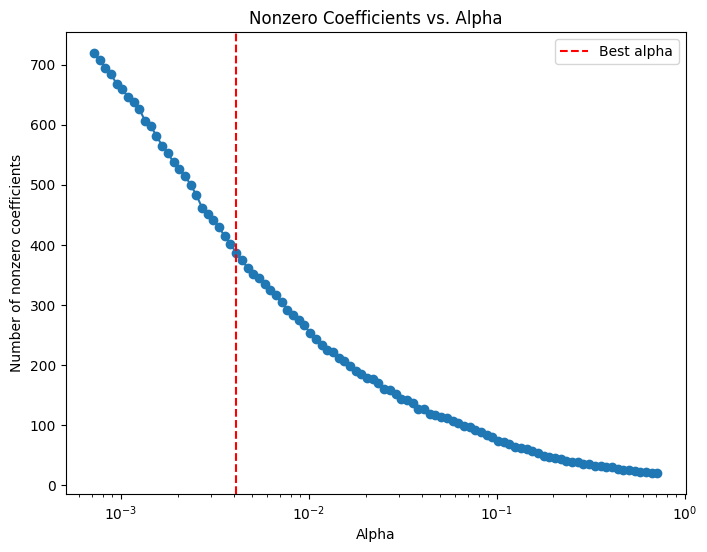

In [ ]:
# Compute the coefficient path over the alpha grid that LassoCV used
alphas, coefs, _ = lasso_path(X_train, np.log(y_train),
                              alphas=lasso_cv.alphas_,
                              max_iter=100000)

# Count nonzero coefficients for each alpha (coefs shape: (n_features, n_alphas))
nonzero_counts = np.sum(coefs != 0, axis=0)

# Plot the number of nonzero coefficients versus alpha
plt.figure(figsize=(8,6))
plt.plot(alphas, nonzero_counts, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Number of nonzero coefficients')
plt.title('Nonzero Coefficients vs. Alpha')
#plt.gca().invert_xaxis()  # Lower alphas (less regularization) on the right
plt.axvline(x=lasso_cv.alpha_, color='red', linestyle='--', label='Best alpha')
plt.legend()
plt.show()

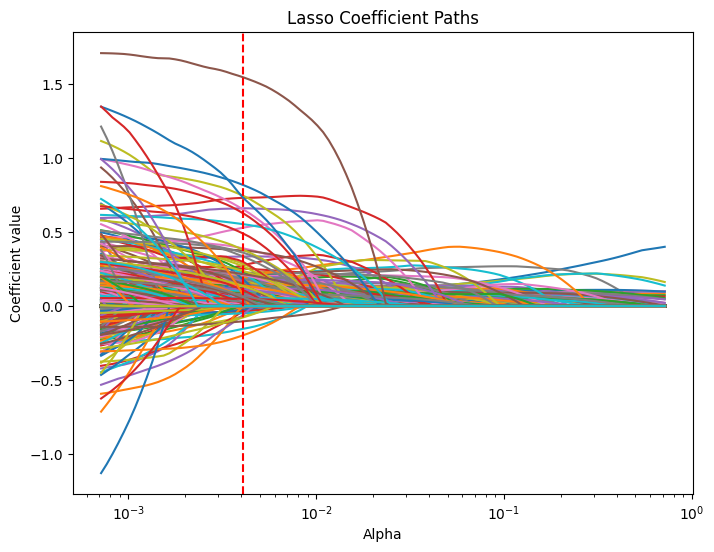

In [9]:
# Compute the lasso path. Note: we use np.log(y_train) because that's what you used in LassoCV.
alphas, coefs, _ = lasso_path(X_train.values, np.log(y_train.values), alphas=lasso_cv.alphas_, max_iter=100000)

plt.figure(figsize=(8, 6))
# Iterate over each predictor and plot its coefficient path.
for i, col in enumerate(X_train.columns):
    plt.plot(alphas, coefs[i, :], label=col)

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient value')
plt.title('Lasso Coefficient Paths')
#plt.gca().invert_xaxis()  # Lower alphas (weaker regularization) to the right.
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axvline(x=lasso_cv.alpha_, color='red', linestyle='--', label='Best alpha')
#plt.legend()
plt.show()

In [10]:
# RidgeCV with a list of alpha values and 3-fold cross-validation
from sklearn.linear_model import RidgeCV, Ridge

alpha_max = 10
alpha_min_ratio = 1e-4
alpha_min = alpha_max * alpha_min_ratio

# Define candidate alpha values
alphas = np.logspace(np.log(alpha_max), np.log(alpha_min), num=5)
alphas

array([2.00717432e+02, 1.00000000e+00, 4.98212830e-03, 2.48216024e-05,
       1.23664407e-07])

In [17]:

ridge_cv = RidgeCV(alphas=alphas, cv=3, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_np, np.log(y_train_np))

print("RidgeCV - Best alpha:", ridge_cv.alpha_)

# Create a DataFrame including the intercept and the coefficients:
coef_ridge = pd.DataFrame({
    'predictor': list(X_train.columns),
    'coefficient': list(ridge_cv.coef_),
    'exp_coefficient': np.exp( list(ridge_cv.coef_) )
})

# Evaluate
y_pred_ridge = ridge_cv.predict(X_test_np)
mse_ridge = mean_squared_error(y_test_np, y_pred_ridge)
print("RidgeCV - MSE:", mse_ridge)



RidgeCV - Best alpha: 200.71743249053017
RidgeCV - MSE: 88099136.93994579


In [18]:
coef_ridge

,predictor,coefficient,exp_coefficient
0,atdmt.com,-0.004977,0.995035
1,yahoo.com,-0.017194,0.982953
2,whenu.com,-0.008336,0.991699
3,weatherbug.com,-0.005399,0.994616
4,msn.com,-0.004900,0.995112
...,...,...,...
995,effectivebrand.com,-0.098469,0.906223
996,dallascowboys.com,-0.039989,0.960800
997,leadgenetwork.com,0.009274,1.009317
998,in.us,-0.033527,0.967029


In [13]:
coef_ridge.query('coefficient != 0').shape[0]

1000

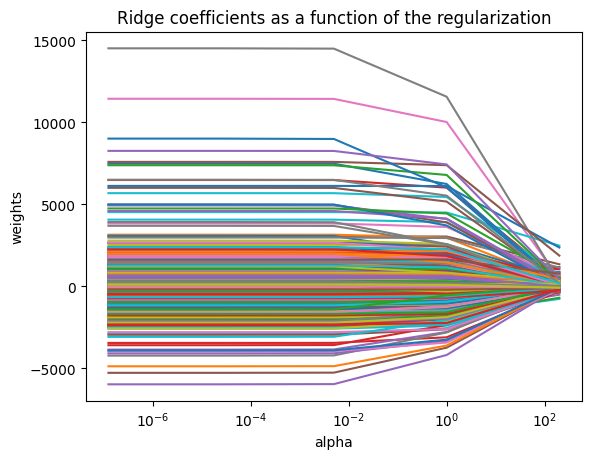

In [16]:
ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train_np, y_train_np)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');